In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## TEIS BDI-3 Analysis

[The Tennessee Early Intervention System (TEIS)](https://www.tn.gov/didd/for-consumers/tennessee-early-intervention-system-teis.html) is a voluntary program that offers therapy and other services to families of infants and young children with developmental delays or disabilities. Services are provided at no cost to families. TEIS is critically important to supporting the development of Tennessee children with disabilities and developmental delays as they prepare for school.

In this project, you are going to be working with data gathered from the Battelle Developmental Inventory, Third Edition (BDI-3) Eligibility Evaluation, an early childhood instrument based on the concept of developmental milestones. The BDI-3 is used by TEIS for determining eligibility and outcomes. This assessment tool has been in use for less than a year now, so the purpose of your work is to analyze the scores to see if there appear to be any weaknesses in this tool in any of the assessed domains or subdomains.

The BDI-3 is divided into 5 domains, each of which has 2 or 3 subdomains. On each domain and subdomain, a child receives several different scores. An example score report is available in the BDI3_ScoreReport.pdf file. See page 3 of this file for a detailed description of each score. Note that the BDI-3 is norm-based, meaning that the scores are generated by the child's performance based on the performance of same-aged peers on the same items. 

Some notes about the data:
* The same instrument is used for determining eligibility and outcomes. The type of evaluation can be determined from the "Program Label" column, which will indicate either an eligibility evaluation, an annual evaluation, or a birthday/milestone or exit evaluation. 
* Some of the rows are duplicated, so be sure to check that in your initial data inspection and cleaning. In addition, some children will have multiple rows in the dataset. A child is evaluated at initial eligibility, annually, and at their 3rd birthday or exit under certain circumstances. The evaluation may be repeated every 4 months (e.g. a child was ineligible and re-referred). 
* There are many records that are missing ID numbers. These records have been given a unique identifier which starts with "SP" so that they can be identified.
* When reading the data in, you may notice that some of the values in the RDI columns are incorrectly converted to dates. It is likely that this happens whenever the numerator of the fraction is 12 or less.

Project Objectives:
1. In which domains (and sub-domains) are children performing highest and lowest?

2. What is the pattern of children's scores? Do individual children tend to perform similarly across all domains or are there differences from domain to domain? Are these patterns similar for all children?

3. Is there a pattern of significant differences in children's scores in the sub-domains within a domain? For example, a gap between a child's expressive (talking) and receptive (understanding) language scores may indicate that additional evaluation is needed for that child's eligibility. A gap between these sub-domains for all or most children may indicate the BDI-3 tool may lack sensitivity in the language domain.

4. Does the child's age seem to impact their scoring?

5. Eligibility is currently based on domains. A child would be considered eligible based on a 40% delay in one area or 25% delay in two areas, as determined by Development Quotient (DQ) scores. A DQ of 70 or less indicates a 40% delay, and a DQ between 71 and 78 indicates a 25% delay. If TEIS added an option for eligibility based on the total score on the BDI-3 total score (DQ score of 70 or less), are there any children who would have qualified that did not qualify based on the current method?

6. Is there any difference in scoring noted based on evaluation type?

7. Is there any notable pattern of scoring by region? Note: TEIS contracts with three agencies for evaluations (one per grand region) as follows:  
* East TN, First TN and Southeast
* Greater Nashville, Upper Cumberland, and South Central
* Northwest, Southwest, and Memphis Delta

8. Is there any notable pattern of scoring by evaluator?

Stretch Goal:
* Investigate the records that are missing ID values. Have they gotten better or worse over time? Are there repeat offenders?
* As noted above, this evaluation may be repeated every 4 months. How often did it occur that a child was assessed multiple times in a time period of less than 120 days. Has this gotten better or worse over time?

In [2]:
dataset = pd.read_excel('../data/BDI3 All Evals for NSS 11-2023.xlsx')

In [3]:
"---------------------------------"

'---------------------------------'

1. In which domains (and sub-domains) are children performing highest and lowest?

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19500 entries, 0 to 19499
Columns: 219 entries, Child ID to Code 10
dtypes: datetime64[ns](14), float64(79), object(126)
memory usage: 32.6+ MB


In [5]:
dataset['Adaptive Sum of Scaled Scores'].mean()

11.412712255681527

In [6]:
dataset['Communication Sum of Scaled Scores'].mean()

13.201499820227028

In [7]:
dataset['Social-Emotional Sum of Scaled Scores'].mean()

22.381152799876816

In [8]:
dataset['Cognitive Sum of Scaled Scores'].mean()

20.220933216980647

In [9]:
dataset['Motor Sum of Scaled Scores'].mean()

22.655333573006008

In [10]:
ss = {'Adaptive' : dataset['Adaptive Sum of Scaled Scores'].mean(), 'Communication' : dataset['Communication Sum of Scaled Scores'].mean(), 'Social-Emotional' : dataset['Social-Emotional Sum of Scaled Scores'].mean(), 'Cognitive' : dataset['Cognitive Sum of Scaled Scores'].mean(), 'Motor' : dataset['Motor Sum of Scaled Scores'].mean()}

domains = ['Adaptive', 'Communication', 'Social-Emotional', 'Cognitive', 'Motor']

ss2 = [dataset['Adaptive Sum of Scaled Scores'].mean(), dataset['Communication Sum of Scaled Scores'].mean(), dataset['Social-Emotional Sum of Scaled Scores'].mean(), dataset['Cognitive Sum of Scaled Scores'].mean(), dataset['Motor Sum of Scaled Scores'].mean()]


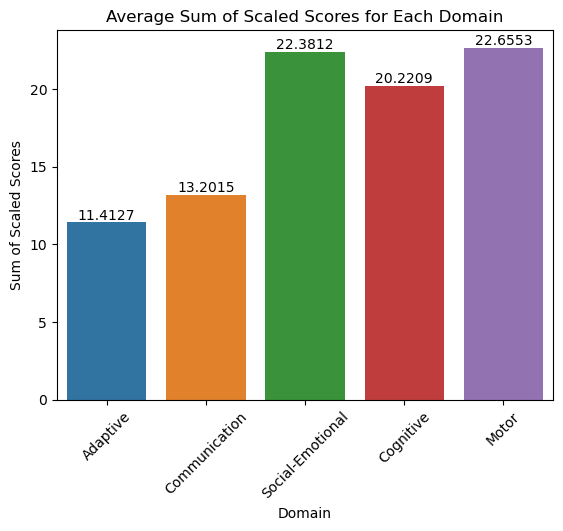

In [11]:
avg_ss = sns.barplot(x=domains,y=ss2)
plt.xlabel("Domain")
plt.ylabel("Sum of Scaled Scores")
plt.title("Average Sum of Scaled Scores for Each Domain")
plt.xticks(rotation=45)
avg_ss.bar_label(avg_ss.containers[0])
plt.savefig('../images/avg_ss_domains.png', format = 'png')

In [12]:
dataset['Adaptive Developmental Quotient'].mean()

87.43507925922125

In [13]:
dataset['Communication Developmental Quotient'].mean()

79.60449946068108

In [14]:
dataset['Social-Emotional Developmental Quotient'].mean()

94.47005081352974

In [15]:
dataset['Motor Developmental Quotient'].mean()

94.51122181706127

In [16]:
dataset['Cognitive Developmental Quotient'].mean()

89.06180380883939

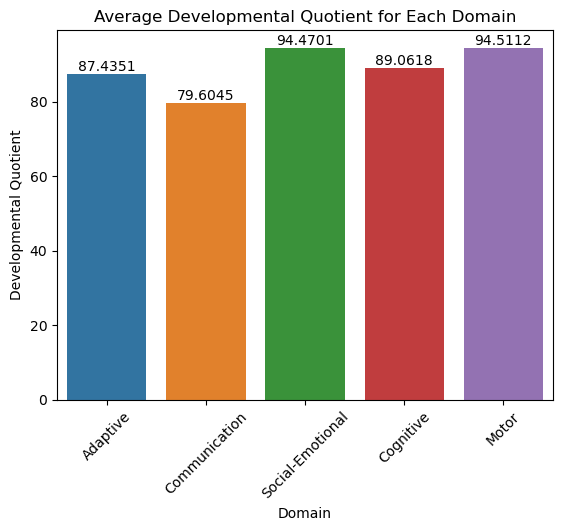

In [17]:
dq = [dataset['Adaptive Developmental Quotient'].mean(), dataset['Communication Developmental Quotient'].mean(), dataset['Social-Emotional Developmental Quotient'].mean(), dataset['Cognitive Developmental Quotient'].mean(), dataset['Motor Developmental Quotient'].mean()]

avg_dq = sns.barplot(x=domains,y=dq)
plt.xlabel("Domain")
plt.ylabel("Developmental Quotient")
plt.title("Average Developmental Quotient for Each Domain")
plt.xticks(rotation=45)
avg_dq.bar_label(avg_dq.containers[0])
plt.savefig('../images/avg_dq_domains.png', format = 'png')

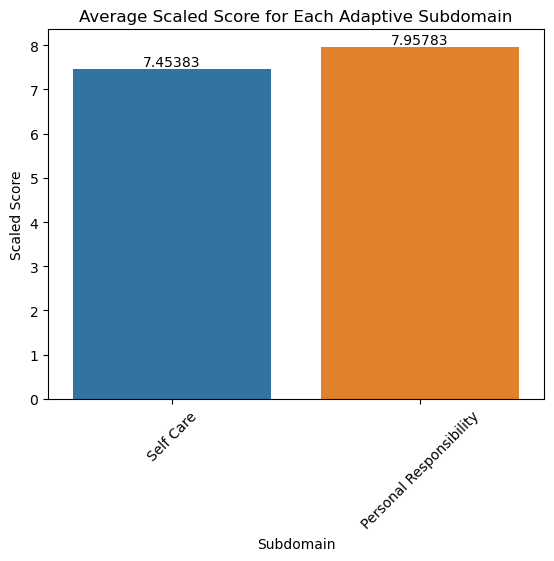

In [18]:
adaptive_subdomain_ss = [dataset['Adaptive-Self Care SS'].mean(), dataset['Adaptive-Personal Responsibility SS'].mean()]
adaptive_subdomain_ss_list = ['Self Care', 'Personal Responsibility']

adaptive_sd = sns.barplot(x=adaptive_subdomain_ss_list,y=adaptive_subdomain_ss)
plt.xlabel("Subdomain")
plt.ylabel("Scaled Score")
plt.title("Average Scaled Score for Each Adaptive Subdomain")
plt.xticks(rotation=45)
adaptive_sd.bar_label(adaptive_sd.containers[0])
plt.savefig('../images/avg_adaptive_ss_subdomains.png', format = 'png')

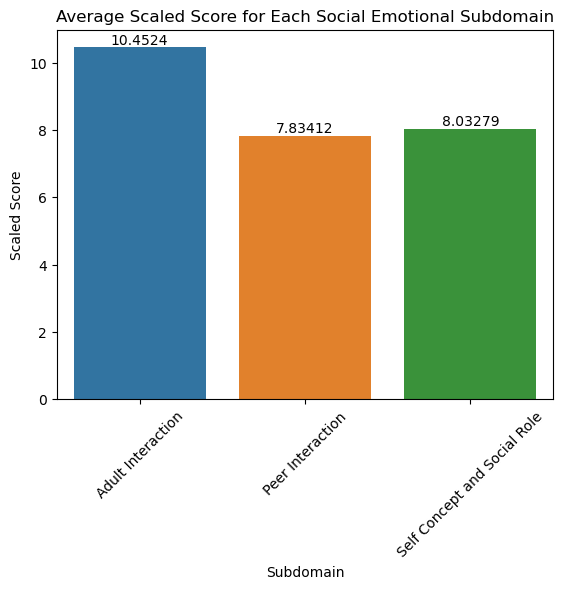

In [19]:
socialemotional_subdomain_ss = [dataset['Social Emotional-Adult Interaction SS'].mean(), dataset['Social Emotional-Peer Interaction SS'].mean(), dataset['Social Emotional-Self Concept / Social Role SS'].mean()]
adaptive_subdomain_ss_list = ['Adult Interaction', 'Peer Interaction', 'Self Concept and Social Role']

se_sd = sns.barplot(x=adaptive_subdomain_ss_list,y=socialemotional_subdomain_ss)
plt.xlabel("Subdomain")
plt.ylabel("Scaled Score")
plt.title("Average Scaled Score for Each Social Emotional Subdomain")
plt.xticks(rotation=45)
se_sd.bar_label(se_sd.containers[0])
plt.savefig('../images/avg_socialemotional_ss_subdomains.png', format = 'png')

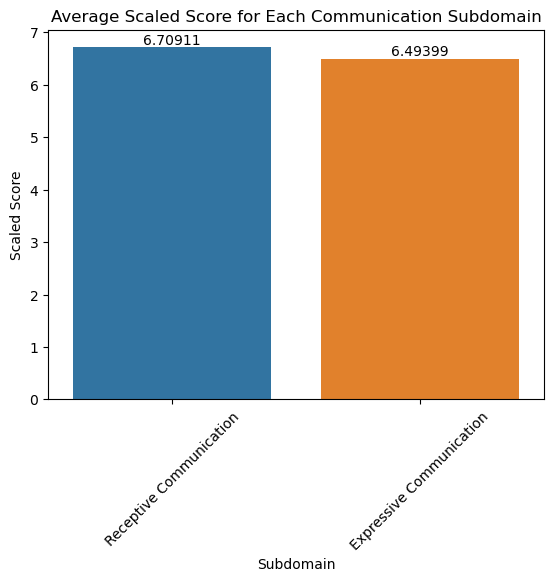

In [20]:
communication_subdomain_ss = [dataset['Communication-Receptive Communication SS'].mean(), dataset['Communication-Expressive Communication SS'].mean()]
adaptive_subdomain_ss_list = ['Receptive Communication', 'Expressive Communication']

comm_sd = sns.barplot(x=adaptive_subdomain_ss_list,y=communication_subdomain_ss)
plt.xlabel("Subdomain")
plt.ylabel("Scaled Score")
plt.title("Average Scaled Score for Each Communication Subdomain")
plt.xticks(rotation=45)
comm_sd.bar_label(comm_sd.containers[0])
plt.savefig('../images/avg_communication_ss_subdomains.png', format = 'png')

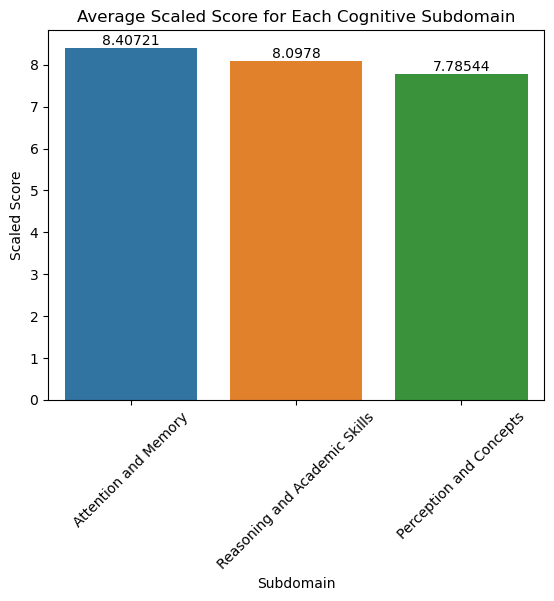

In [21]:
cognitive_subdomain_ss = [dataset['Cognitive-Attention and Memory SS'].mean(), dataset['Cognitive-Reasoning / Academic Skills SS'].mean(), dataset['Cognitive-Perception and Concepts SS'].mean()]
cognitive_subdomain_ss_list = ['Attention and Memory', 'Reasoning and Academic Skills', 'Perception and Concepts']

cog_sd = sns.barplot(x=cognitive_subdomain_ss_list,y=cognitive_subdomain_ss)
plt.xlabel("Subdomain")
plt.ylabel("Scaled Score")
plt.title("Average Scaled Score for Each Cognitive Subdomain")
plt.xticks(rotation=45)
cog_sd.bar_label(cog_sd.containers[0])
plt.savefig('../images/avg_cognitive_ss_subdomains.png', format = 'png')

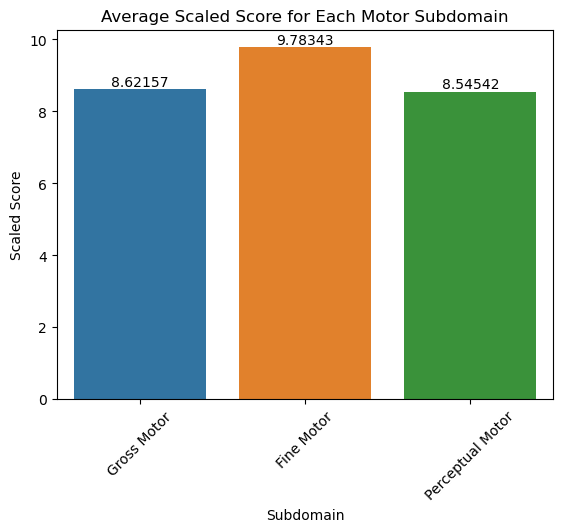

In [22]:
motor_subdomain_ss = [dataset['Motor-Gross Motor SS'].mean(), dataset['Motor-Fine Motor SS'].mean(), dataset['Motor-Perceptual Motor SS'].mean()]
motor_subdomain_ss_list = ['Gross Motor', 'Fine Motor', 'Perceptual Motor']

motor_sd = sns.barplot(x=motor_subdomain_ss_list,y=motor_subdomain_ss)
plt.xlabel("Subdomain")
plt.ylabel("Scaled Score")
plt.title("Average Scaled Score for Each Motor Subdomain")
plt.xticks(rotation=45)
motor_sd.bar_label(motor_sd.containers[0])
plt.savefig('../images/avg_motor_ss_subdomains.png', format = 'png')

In [23]:
dataset['age'] = dataset['Adaptive-Self Care Date of Testing'] - dataset['Date of Birth']

In [24]:
dataset.head()

,Child ID,Gender,Date of Birth,Location - Sub Level 1,Program Label,Adaptive Sum of Scaled Scores,Adaptive Developmental Quotient,Adaptive Percentile Rank,Adaptive 95% Confidence Interval,Adaptive RDI,...,Code 2,Code 3,Code 4,Code 5,Code 6,Code 7,Code 8,Code 9,Code 10,age
0,44879,F,2022-09-27,Southwest,BDI-3 Eligibility Evaluation,7.0,85.0,16,77-97,39/90,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,269 days
1,47795,F,2020-12-23,Greater Nashville,BDI-3 Eligibility Evaluation,16.0,88.0,21,82-96,79/90,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,818 days
2,54340,M,2021-06-22,First Tennessee,BDI-3 Eligibility Evaluation,8.0,90.0,25,81-101,77/90,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,653 days
3,54344,F,2022-03-07,Southeast Tennessee,BDI-3 Eligibility Evaluation,13.0,115.0,84,103-123,99/90,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,353 days
4,54515,M,2021-11-04,Memphis Delta,BDI-3 Eligibility Evaluation,5.0,75.0,5,68-88,1990-09-01 00:00:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,477 days


In [25]:
dataset['Location - Sub Level 1'].unique()

array(['Southwest', 'Greater Nashville', 'First Tennessee',
       'Southeast Tennessee', 'Memphis Delta', 'Northwest',
       'Upper Cumberland', 'East Tennessee', 'South Central', nan],
      dtype=object)

In [26]:
dataset.groupby(dataset['Location - Sub Level 1']).size()

Location - Sub Level 1
East Tennessee         3340
First Tennessee        1701
Greater Nashville      3436
Memphis Delta          2717
Northwest               955
South Central          2560
Southeast Tennessee    1583
Southwest              1100
Upper Cumberland       2021
dtype: int64

7. Is there any notable pattern of scoring by region? Note: TEIS contracts with three agencies for evaluations (one per grand region) as follows:  
* East TN, First TN and Southeast
* Greater Nashville, Upper Cumberland, and South Central
* Northwest, Southwest, and Memphis Delta

In [27]:
location_groups = {
    'East Tennessee': 'East',
    'First Tennessee': 'East',
    'Southeast Tennessee': 'East',
    'Greater Nashville': 'Middle TN',
    'Upper Cumberland': 'Middle TN',
    'South Central': 'Middle TN',
    'Northwest': 'West',
    'Southwest': 'West',
    'Memphis Delta': 'West'
}


dataset['Location Group'] = dataset['Location - Sub Level 1'].map(location_groups)


dataset['Location Group'].fillna('Other', inplace=True)

In [28]:
check_columns = ['Adaptive Sum of Scaled Scores', 'Social-Emotional Sum of Scaled Scores', 'Communication Sum of Scaled Scores', 'Motor Sum of Scaled Scores', 'Cognitive Sum of Scaled Scores']

In [29]:
dataset.dropna(subset=check_columns, how='all', inplace=True)

In [30]:
dataset.columns = dataset.columns.str.replace(' ', '_')

dataset.columns = dataset.columns.str.replace('-', '_')

dataset.columns = dataset.columns.str.replace('__', '_')

In [31]:
dataset['Program_Label'].unique()

array(['BDI-3 Eligibility Evaluation', 'BDI-3 Annual Evaluation',
       'BDI-3 Milestone or Exit Evaluation'], dtype=object)

In [32]:
eligibility_eval = dataset[dataset['Program_Label']=='BDI-3 Eligibility Evaluation']

annual_eval = dataset[dataset['Program_Label']=='BDI-3 Annual Evaluation']

exit_eval = dataset[dataset['Program_Label']=='BDI-3 Milestone or Exit Evaluation']

In [33]:
location_check = ['Location__Sub_Level_1']

dataset.dropna(subset=location_check,how='all', inplace=True)

[Text(0, 0, '10.9669'),
 Text(0, 0, '13.6887'),
 Text(0, 0, '21.4851'),
 Text(0, 0, '20.5164'),
 Text(0, 0, '22.4524')]

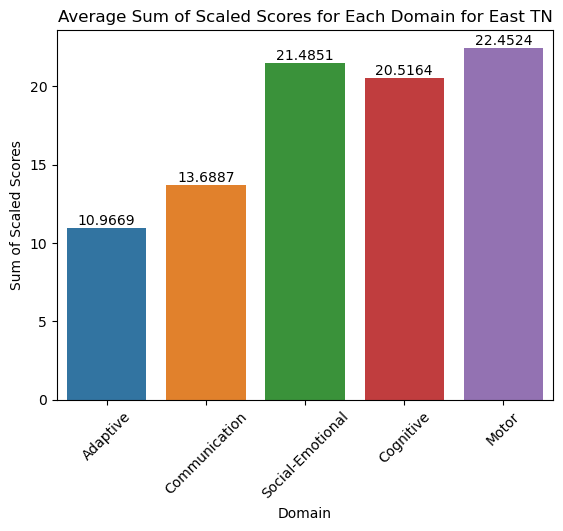

In [34]:
ss_avg_east = [dataset[dataset['Location_Group']=='East']['Adaptive_Sum_of_Scaled_Scores'].mean(), dataset[dataset['Location_Group']=='East']['Communication_Sum_of_Scaled_Scores'].mean(), dataset[dataset['Location_Group']=='East']['Social_Emotional_Sum_of_Scaled_Scores'].mean(), dataset[dataset['Location_Group']=='East']['Cognitive_Sum_of_Scaled_Scores'].mean(), dataset[dataset['Location_Group']=='East']['Motor_Sum_of_Scaled_Scores'].mean()]

ss_avg_east_barplot = sns.barplot(x=domains,y=ss_avg_east)
plt.xlabel("Domain")
plt.ylabel("Sum of Scaled Scores")
plt.title("Average Sum of Scaled Scores for Each Domain for East TN")
plt.xticks(rotation=45)
ss_avg_east_barplot.bar_label(ss_avg_east_barplot.containers[0])

[Text(0, 0, '11.6057'),
 Text(0, 0, '12.9901'),
 Text(0, 0, '23.6644'),
 Text(0, 0, '20.3275'),
 Text(0, 0, '23.2356')]

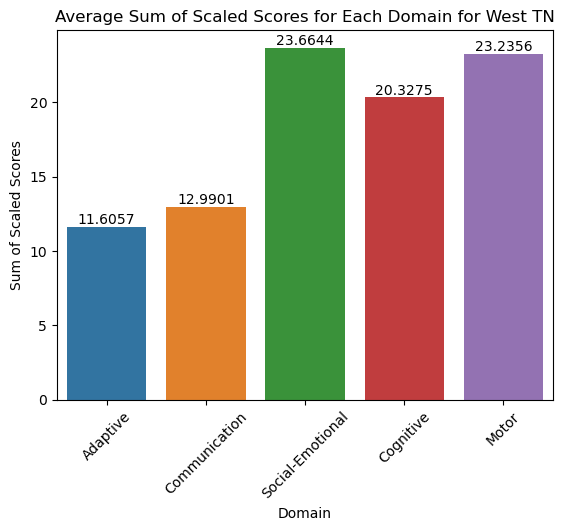

In [35]:
ss_avg_west = [dataset[dataset['Location_Group']=='West']['Adaptive_Sum_of_Scaled_Scores'].mean(), dataset[dataset['Location_Group']=='West']['Communication_Sum_of_Scaled_Scores'].mean(), dataset[dataset['Location_Group']=='West']['Social_Emotional_Sum_of_Scaled_Scores'].mean(), dataset[dataset['Location_Group']=='West']['Cognitive_Sum_of_Scaled_Scores'].mean(), dataset[dataset['Location_Group']=='West']['Motor_Sum_of_Scaled_Scores'].mean()]

ss_avg_west_barplot = sns.barplot(x=domains,y=ss_avg_west)
plt.xlabel("Domain")
plt.ylabel("Sum of Scaled Scores")
plt.title("Average Sum of Scaled Scores for Each Domain for West TN")
plt.xticks(rotation=45)
ss_avg_west_barplot.bar_label(ss_avg_west_barplot.containers[0])

[Text(0, 0, '11.6218'),
 Text(0, 0, '12.945'),
 Text(0, 0, '22.314'),
 Text(0, 0, '19.9244'),
 Text(0, 0, '22.4713')]

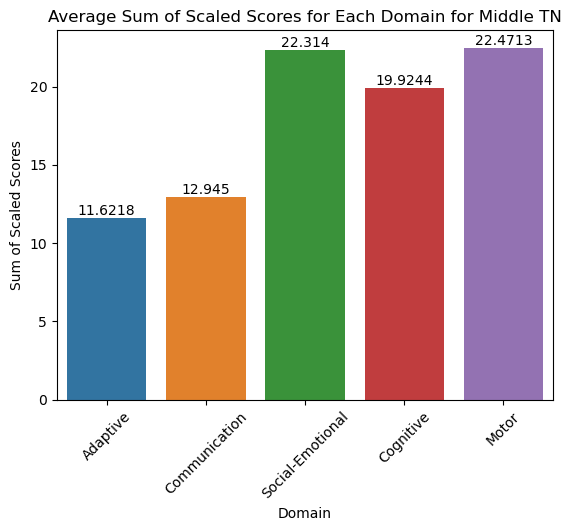

In [36]:
ss_avg_mid = [dataset[dataset['Location_Group']=='Middle TN']['Adaptive_Sum_of_Scaled_Scores'].mean(), dataset[dataset['Location_Group']=='Middle TN']['Communication_Sum_of_Scaled_Scores'].mean(), dataset[dataset['Location_Group']=='Middle TN']['Social_Emotional_Sum_of_Scaled_Scores'].mean(), dataset[dataset['Location_Group']=='Middle TN']['Cognitive_Sum_of_Scaled_Scores'].mean(), dataset[dataset['Location_Group']=='Middle TN']['Motor_Sum_of_Scaled_Scores'].mean()]

ss_avg_mid_barplot = sns.barplot(x=domains,y=ss_avg_mid)
plt.xlabel("Domain")
plt.ylabel("Sum of Scaled Scores")
plt.title("Average Sum of Scaled Scores for Each Domain for Middle TN")
plt.xticks(rotation=45)
ss_avg_mid_barplot.bar_label(ss_avg_mid_barplot.containers[0])

In [37]:
# filter for all PR columns
pr_columns = [col for col in dataset.columns if 'PR' in col]


for col in pr_columns:
    dataset[col] = pd.to_numeric(dataset[col], errors='coerce')


location_grouped_data = dataset.groupby('Location_Group')


pr_stats = {col: location_grouped_data[col].agg(['mean', 'median', 'std', 'count', 'min', 'max']) for col in pr_columns}


for col, stats in pr_stats.items():
    print(f"Statistics for {col}:\n", stats, "\n")

Statistics for Adaptive_Self_Care_PR:
                      mean  median        std  count  min   max
Location_Group                                                
East            30.128285    25.0  24.909779   6127  1.0  99.0
Middle TN       29.599756    25.0  24.994755   7383  1.0  99.0
West            30.855980    25.0  25.947653   4423  1.0  99.0 

Statistics for Adaptive_Personal_Responsibility_PR:
                      mean  median        std  count  min   max
Location_Group                                                
East            33.909190    25.0  28.008053   2753  1.0  99.0
Middle TN       40.886159    37.0  31.399522   3663  1.0  99.0
West            38.977138    37.0  29.787467   2187  1.0  99.0 

Statistics for Social_Emotional_Adult_Interaction_PR:
                      mean  median        std  count  min   max
Location_Group                                                
East            53.181037    50.0  25.771027   6518  1.0  99.0
Middle TN       55.158943    6

In [38]:
19497

19497

In [39]:
dataset.replace('', pd.NA, inplace=True)

In [40]:
check_columns = ['Adaptive_Sum_of_Scaled_Scores', 'Social_Emotional_Sum_of_Scaled_Scores', 'Communication_Sum_of_Scaled_Scores', 'Motor_Sum_of_Scaled_Scores', 'Cognitive_Sum_of_Scaled_Scores']

dataset.dropna(subset=check_columns, how='all', inplace=True)

In [41]:
dataset['TEST_DATE'] = dataset['Adaptive_Self_Care_Date_of_Testing']

In [42]:
date_nan = 'TEST_DATE'
rows_with_nan_test_date = dataset[dataset[date_nan].isna()]

In [43]:
dataset.at[13301,'TEST_DATE']= pd.to_datetime('2023-08-21')

dataset.at[14721,'TEST_DATE'] = pd.to_datetime('2023-05-09')

dataset.at[23271,'TEST_DATE']= pd.to_datetime('2023-07-17')

In [44]:
dataset['AGE_AT_TEST_DAYS'] = dataset['TEST_DATE'] - dataset['Date_of_Birth']

dataset['AGE_AT_TEST_YEARS'] = (dataset['TEST_DATE'].dt.year - dataset['Date_of_Birth'].dt.year)

In [45]:
dataset

,Child_ID,Gender,Date_of_Birth,Location__Sub_Level_1,Program_Label,Adaptive_Sum_of_Scaled_Scores,Adaptive_Developmental_Quotient,Adaptive_Percentile_Rank,Adaptive_95%_Confidence_Interval,Adaptive_RDI,...,Code_6,Code_7,Code_8,Code_9,Code_10,age,Location_Group,TEST_DATE,AGE_AT_TEST_DAYS,AGE_AT_TEST_YEARS
0,44879,F,2022-09-27,Southwest,BDI-3 Eligibility Evaluation,7.0,85.0,16,77-97,39/90,...,NaN,NaN,NaN,NaN,NaN,269 days,West,2023-06-23,269 days,1.0
1,47795,F,2020-12-23,Greater Nashville,BDI-3 Eligibility Evaluation,16.0,88.0,21,82-96,79/90,...,NaN,NaN,NaN,NaN,NaN,818 days,Middle TN,2023-03-21,818 days,3.0
2,54340,M,2021-06-22,First Tennessee,BDI-3 Eligibility Evaluation,8.0,90.0,25,81-101,77/90,...,NaN,NaN,NaN,NaN,NaN,653 days,East,2023-04-06,653 days,2.0
3,54344,F,2022-03-07,Southeast Tennessee,BDI-3 Eligibility Evaluation,13.0,115.0,84,103-123,99/90,...,NaN,NaN,NaN,NaN,NaN,353 days,East,2023-02-23,353 days,1.0
4,54515,M,2021-11-04,Memphis Delta,BDI-3 Eligibility Evaluation,5.0,75.0,5,68-88,1990-09-01 00:00:00,...,NaN,NaN,NaN,NaN,NaN,477 days,West,2023-02-24,477 days,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19496,SP03288,F,2021-05-18,South Central,BDI-3 Eligibility Evaluation,25.0,115.0,84,107-121,96/90,...,NaN,NaN,NaN,NaN,NaN,909 days,Middle TN,2023-11-13,909 days,2.0
19497,SP03289,F,2021-10-31,South Central,BDI-3 Eligibility Evaluation,21.0,103.0,58,96-110,92/90,...,NaN,NaN,NaN,NaN,NaN,744 days,Middle TN,2023-11-14,744 days,2.0
19498,SP03290,M,2020-03-25,Memphis Delta,BDI-3 Annual Evaluation,16.0,88.0,21,82-96,66/90,...,NaN,NaN,NaN,NaN,NaN,1310 days,West,2023-10-26,1310 days,3.0
19499,SP03291,M,2023-09-18,Greater Nashville,BDI-3 Eligibility Evaluation,11.0,105.0,63,94-114,94/90,...,NaN,NaN,NaN,NaN,NaN,36 days,Middle TN,2023-10-24,36 days,0.0


In [46]:
data = pd.read_excel('../data/BDI3 All Evals for NSS 11-2023.xlsx')

In [48]:
dataset_clean = data.drop_duplicates()


dataset_clean.columns = dataset_clean.columns.str.replace(' ', '_')
dataset_clean.columns = dataset_clean.columns.str.replace('-', '_')
dataset_clean.columns = dataset_clean.columns.str.replace('__', '_')


dataset_clean.replace('', pd.NA, inplace=True)


check_columns = ['Adaptive_Sum_of_Scaled_Scores', 'Social_Emotional_Sum_of_Scaled_Scores', 'Communication_Sum_of_Scaled_Scores', 'Motor_Sum_of_Scaled_Scores', 'Cognitive_Sum_of_Scaled_Scores']


dataset_clean.dropna(subset=check_columns, how='all', inplace=True)


dataset_clean['TEST_DATE'] = dataset_clean['Adaptive_Self_Care_Date_of_Testing']


date_nan = 'TEST_DATE'
rows_with_nan_test_date = dataset_clean[dataset_clean[date_nan].isna()]


dataset_clean.at[13301,'TEST_DATE']= pd.to_datetime('2023-08-21')

dataset_clean.at[14721,'TEST_DATE'] = pd.to_datetime('2023-05-09')

dataset_clean.at[23271,'TEST_DATE']= pd.to_datetime('2023-07-17')


dataset_clean['AGE_AT_TEST_DAYS'] = dataset_clean['TEST_DATE'] - dataset_clean['Date_of_Birth']

dataset_clean['AGE_AT_TEST_YEARS'] = (dataset_clean['TEST_DATE'].dt.year - dataset_clean['Date_of_Birth'].dt.year)

In [53]:
location_groups = {
    'East Tennessee': 'East',
    'First Tennessee': 'East',
    'Southeast Tennessee': 'East',
    'Greater Nashville': 'Middle TN',
    'Upper Cumberland': 'Middle TN',
    'South Central': 'Middle TN',
    'Northwest': 'West',
    'Southwest': 'West',
    'Memphis Delta': 'West'
}


dataset_clean['Location_Group'] = dataset_clean['Location__Sub_Level_1'].map(location_groups)


dataset_clean['Location_Group'].fillna('Other', inplace=True)

In [54]:
dataset_clean

,Child_ID,Gender,Date_of_Birth,Location__Sub_Level_1,Program_Label,Adaptive_Sum_of_Scaled_Scores,Adaptive_Developmental_Quotient,Adaptive_Percentile_Rank,Adaptive_95%_Confidence_Interval,Adaptive_RDI,...,Code_6,Code_7,Code_8,Code_9,Code_10,TEST_DATE,AGE_AT_TEST_DAYS,AGE_AT_TEST_YEARS,Location Group,Location_Group
0,44879,F,2022-09-27,Southwest,BDI-3 Eligibility Evaluation,7.0,85.0,16,77-97,39/90,...,NaN,NaN,NaN,NaN,NaN,2023-06-23,269 days,1.0,West,West
1,47795,F,2020-12-23,Greater Nashville,BDI-3 Eligibility Evaluation,16.0,88.0,21,82-96,79/90,...,NaN,NaN,NaN,NaN,NaN,2023-03-21,818 days,3.0,Middle TN,Middle TN
2,54340,M,2021-06-22,First Tennessee,BDI-3 Eligibility Evaluation,8.0,90.0,25,81-101,77/90,...,NaN,NaN,NaN,NaN,NaN,2023-04-06,653 days,2.0,East,East
3,54344,F,2022-03-07,Southeast Tennessee,BDI-3 Eligibility Evaluation,13.0,115.0,84,103-123,99/90,...,NaN,NaN,NaN,NaN,NaN,2023-02-23,353 days,1.0,East,East
4,54515,M,2021-11-04,Memphis Delta,BDI-3 Eligibility Evaluation,5.0,75.0,5,68-88,1990-09-01 00:00:00,...,NaN,NaN,NaN,NaN,NaN,2023-02-24,477 days,2.0,West,West
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19496,SP03288,F,2021-05-18,South Central,BDI-3 Eligibility Evaluation,25.0,115.0,84,107-121,96/90,...,NaN,NaN,NaN,NaN,NaN,2023-11-13,909 days,2.0,Middle TN,Middle TN
19497,SP03289,F,2021-10-31,South Central,BDI-3 Eligibility Evaluation,21.0,103.0,58,96-110,92/90,...,NaN,NaN,NaN,NaN,NaN,2023-11-14,744 days,2.0,Middle TN,Middle TN
19498,SP03290,M,2020-03-25,Memphis Delta,BDI-3 Annual Evaluation,16.0,88.0,21,82-96,66/90,...,NaN,NaN,NaN,NaN,NaN,2023-10-26,1310 days,3.0,West,West
19499,SP03291,M,2023-09-18,Greater Nashville,BDI-3 Eligibility Evaluation,11.0,105.0,63,94-114,94/90,...,NaN,NaN,NaN,NaN,NaN,2023-10-24,36 days,0.0,Middle TN,Middle TN


In [64]:
# Number of Eligibility Evaluation rows in cleaned dataset
dataset[dataset['Program_Label']=='BDI-3 Eligibility Evaluation']['Child_ID'].count()

12384

In [65]:
# Number of Annual Evaluation rows in cleaned dataset
dataset[dataset['Program_Label']=='BDI-3 Annual Evaluation']['Child_ID'].count()

6823

In [66]:
# Number of Exit Evaluation rows in cleaned dataset
dataset[dataset['Program_Label']=='BDI-3 Milestone or Exit Evaluation']['Child_ID'].count()

203

In [ ]:
ss_avg_mid = [dataset[dataset['Location_Group']=='Middle TN']['Adaptive_Sum_of_Scaled_Scores'].mean(), dataset[dataset['Location_Group']=='Middle TN']['Communication_Sum_of_Scaled_Scores'].mean(), dataset[dataset['Location_Group']=='Middle TN']['Social_Emotional_Sum_of_Scaled_Scores'].mean(), dataset[dataset['Location_Group']=='Middle TN']['Cognitive_Sum_of_Scaled_Scores'].mean(), dataset[dataset['Location_Group']=='Middle TN']['Motor_Sum_of_Scaled_Scores'].mean()]

midtn = sns.barplot(x=domains,y=ss_avg_mid)
plt.xlabel("Domain")
plt.ylabel("Sum of Scaled Scores")
plt.title("Average Sum of Scaled Scores for Each Domain for Middle TN")
plt.xticks(rotation=45)
ss_avg_mid_barplot.bar_label(ss_avg_mid_barplot.containers[0])

In [67]:
ss_avg_mid

[11.62183406113537,
 12.945048082927439,
 22.31395058647367,
 19.924354013231806,
 22.471264367816094]

[Text(0, 0, '87.7658'),
 Text(0, 0, '78.8351'),
 Text(0, 0, '94.1093'),
 Text(0, 0, '88.1143'),
 Text(0, 0, '93.8768')]

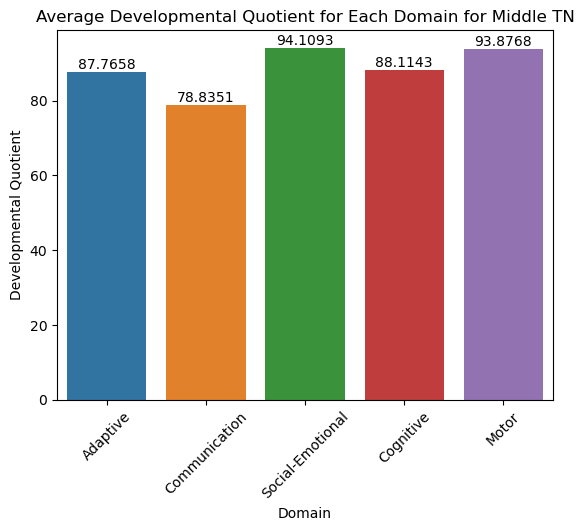

In [86]:
regions_mid_avg = [dataset_clean[dataset_clean['Location_Group']=='Middle TN']['Adaptive_Developmental_Quotient'].mean(), dataset_clean[dataset_clean['Location_Group']=='Middle TN']['Communication_Developmental_Quotient'].mean(), dataset_clean[dataset_clean['Location_Group']=='Middle TN']['Social_Emotional_Developmental_Quotient'].mean(), dataset_clean[dataset_clean['Location_Group']=='Middle TN']['Cognitive_Developmental_Quotient'].mean(), dataset_clean[dataset_clean['Location_Group']=='Middle TN']['Motor_Developmental_Quotient'].mean()]

regions_mid = sns.barplot(x=domains,y=regions_mid_avg)
plt.xlabel("Domain")
plt.ylabel("Developmental Quotient")
plt.title("Average Developmental Quotient for Each Domain for Middle TN")
plt.xticks(rotation=45)
regions_mid.bar_label(regions_mid.containers[0])

/var/folders/73/8ylhfl6151q5ccx79mch6ddc0000gn/T/ipykernel_11089/2763645678.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  regions_mid_avg_annual = [dataset_clean[dataset_clean['Location_Group']=='Middle TN'][dataset_clean['Program_Label']=='BDI-3 Annual Evaluation']['Adaptive_Developmental_Quotient'].mean(), dataset_clean[dataset_clean['Location_Group']=='Middle TN'][dataset_clean['Program_Label']=='BDI-3 Annual Evaluation']['Communication_Developmental_Quotient'].mean(), dataset_clean[dataset_clean['Location_Group']=='Middle TN'][dataset_clean['Program_Label']=='BDI-3 Annual Evaluation']['Social_Emotional_Developmental_Quotient'].mean(), dataset_clean[dataset_clean['Location_Group']=='Middle TN'][dataset_clean['Program_Label']=='BDI-3 Annual Evaluation']['Cognitive_Developmental_Quotient'].mean(), dataset_clean[dataset_clean['Location_Group']=='Middle TN'][dataset_clean['Program_Label']=='BDI-3 Annual Evaluation']['Motor_Developmental_Quotient'].m

[Text(0, 0, '85.5384'),
 Text(0, 0, '77.1398'),
 Text(0, 0, '93.1025'),
 Text(0, 0, '85.1423'),
 Text(0, 0, '90.374')]

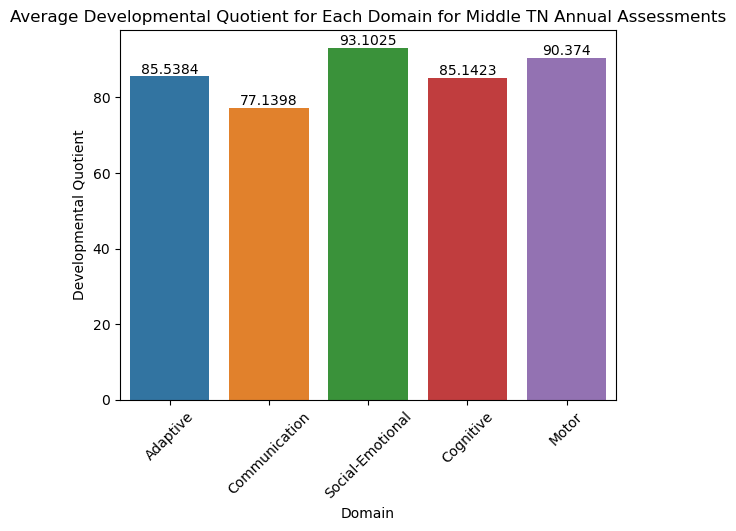

In [89]:
regions_mid_avg_annual = [dataset_clean[dataset_clean['Location_Group']=='Middle TN'][dataset_clean['Program_Label']=='BDI-3 Annual Evaluation']['Adaptive_Developmental_Quotient'].mean(), dataset_clean[dataset_clean['Location_Group']=='Middle TN'][dataset_clean['Program_Label']=='BDI-3 Annual Evaluation']['Communication_Developmental_Quotient'].mean(), dataset_clean[dataset_clean['Location_Group']=='Middle TN'][dataset_clean['Program_Label']=='BDI-3 Annual Evaluation']['Social_Emotional_Developmental_Quotient'].mean(), dataset_clean[dataset_clean['Location_Group']=='Middle TN'][dataset_clean['Program_Label']=='BDI-3 Annual Evaluation']['Cognitive_Developmental_Quotient'].mean(), dataset_clean[dataset_clean['Location_Group']=='Middle TN'][dataset_clean['Program_Label']=='BDI-3 Annual Evaluation']['Motor_Developmental_Quotient'].mean()]

regions_mid_annual = sns.barplot(x=domains,y=regions_mid_avg_annual)
plt.xlabel("Domain")
plt.ylabel("Developmental Quotient")
plt.title("Average Developmental Quotient for Each Domain for Middle TN Annual Assessments")
plt.xticks(rotation=45)
regions_mid_annual.bar_label(regions_mid_annual.containers[0])

[Text(0, 0, '88.0975'),
 Text(0, 0, '78.9704'),
 Text(0, 0, '97.5887'),
 Text(0, 0, '89.5078'),
 Text(0, 0, '95.9574')]

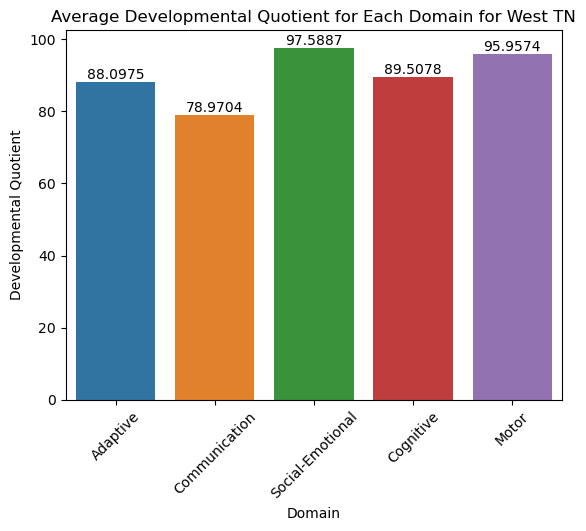

In [81]:
regions_west_avg = [dataset[dataset['Location_Group']=='West']['Adaptive_Developmental_Quotient'].mean(), dataset[dataset['Location_Group']=='West']['Communication_Developmental_Quotient'].mean(), dataset[dataset['Location_Group']=='West']['Social_Emotional_Developmental_Quotient'].mean(), dataset[dataset['Location_Group']=='West']['Cognitive_Developmental_Quotient'].mean(), dataset[dataset['Location_Group']=='West']['Motor_Developmental_Quotient'].mean()]

regions_west = sns.barplot(x=domains,y=regions_west_avg)
plt.xlabel("Domain")
plt.ylabel("Developmental Quotient")
plt.title("Average Developmental Quotient for Each Domain for West TN")
plt.xticks(rotation=45)
regions_west.bar_label(regions_west.containers[0])

[Text(0, 0, '86.4909'),
 Text(0, 0, '81.066'),
 Text(0, 0, '92.6186'),
 Text(0, 0, '89.9865'),
 Text(0, 0, '94.3027')]

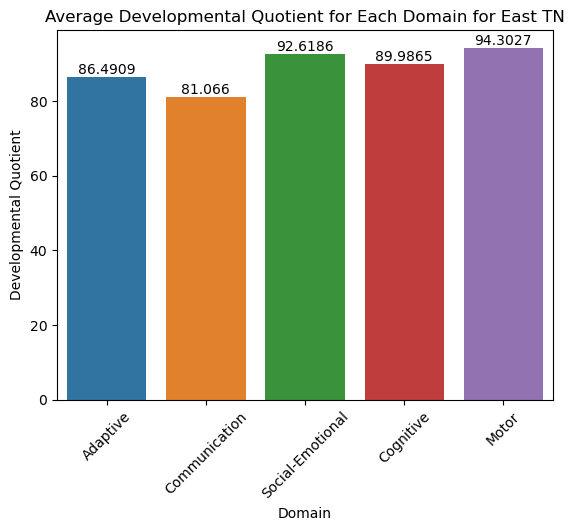

In [82]:
regions_east_avg = [dataset[dataset['Location_Group']=='East']['Adaptive_Developmental_Quotient'].mean(), dataset[dataset['Location_Group']=='East']['Communication_Developmental_Quotient'].mean(), dataset[dataset['Location_Group']=='East']['Social_Emotional_Developmental_Quotient'].mean(), dataset[dataset['Location_Group']=='East']['Cognitive_Developmental_Quotient'].mean(), dataset[dataset['Location_Group']=='East']['Motor_Developmental_Quotient'].mean()]

regions_east = sns.barplot(x=domains,y=regions_east_avg)
plt.xlabel("Domain")
plt.ylabel("Developmental Quotient")
plt.title("Average Developmental Quotient for Each Domain for East TN")
plt.xticks(rotation=45)
regions_east.bar_label(regions_east.containers[0])

In [78]:
dataset_clean[dataset_clean['Program_Label']=='BDI-3 Annual Evaluation']['Child_ID'].value_counts(ascending=False).reset_index

<bound method Series.reset_index of Child_ID
533717     3
533951     3
501346     2
536929     2
512206     2
          ..
524849     1
524846     1
524842     1
524830     1
SP03290    1
Name: count, Length: 6841, dtype: int64>

In [75]:
dataset_clean[dataset_clean['Child_ID']==533717]

,Child_ID,Gender,Date_of_Birth,Location__Sub_Level_1,Program_Label,Adaptive_Sum_of_Scaled_Scores,Adaptive_Developmental_Quotient,Adaptive_Percentile_Rank,Adaptive_95%_Confidence_Interval,Adaptive_RDI,...,Code_6,Code_7,Code_8,Code_9,Code_10,TEST_DATE,AGE_AT_TEST_DAYS,AGE_AT_TEST_YEARS,Location Group,Location_Group
4746,533717,M,2020-08-24,First Tennessee,BDI-3 Annual Evaluation,25.0,115.0,84,107-121,96/90,...,NaN,NaN,NaN,NaN,NaN,2023-08-14,1085 days,3.0,East,East
4747,533717,M,2020-08-24,First Tennessee,BDI-3 Annual Evaluation,26.0,118.0,88,110-124,97/90,...,NaN,NaN,NaN,NaN,NaN,2023-08-08,1079 days,3.0,East,East
4748,533717,M,2020-08-24,First Tennessee,BDI-3 Annual Evaluation,26.0,118.0,88,110-124,97/90,...,NaN,NaN,NaN,NaN,NaN,2023-08-08,1079 days,3.0,East,East


In [94]:
dataset_clean['Adaptive_PR'] = dataset_clean['Adaptive_Percentile_Rank']
dataset_clean['Social_Emotional_PR'] = dataset_clean['Social_Emotional_Percentile_Rank']
dataset_clean['Communication_PR'] = dataset_clean['Communication_Percentile_Rank']
dataset_clean['Motor_PR'] = dataset_clean['Motor_Percentile_Rank']
dataset_clean['Cognitive_PR'] = dataset_clean['Cognitive_Percentile_Rank']

percentile_columns = ['Adaptive_Percentile_Rank','Social_Emotional_Percentile_Rank','Communication_Percentile_Rank','Motor_Percentile_Rank','Cognitive_Percentile_Rank']

dataset_clean[percentile_columns] = dataset_clean[percentile_columns].replace('<0.1', '0.1')

In [98]:
dataset_clean.columns

Index(['Child_ID', 'Gender', 'Date_of_Birth', 'Location__Sub_Level_1',
       'Program_Label', 'Adaptive_Sum_of_Scaled_Scores',
       'Adaptive_Developmental_Quotient', 'Adaptive_Percentile_Rank',
       'Adaptive_95%_Confidence_Interval', 'Adaptive_RDI',
       ...
       'TEST_DATE', 'AGE_AT_TEST_DAYS', 'AGE_AT_TEST_YEARS', 'Location Group',
       'Location_Group', 'Adaptive_PR', 'Social_Emotional_PR',
       'Communication_PR', 'Motor_PR', 'Cognitive_PR'],
      dtype='object', length=229)

In [104]:
dataset_clean_eligibility = dataset_clean[dataset_clean["Program_Label"] == 'BDI-3 Eligibility Evaluation']

In [108]:
dq_columns = ['Adaptive_Developmental_Quotient','Social_Emotional_Developmental_Quotient','Communication_Developmental_Quotient','Motor_Developmental_Quotient','Cognitive_Developmental_Quotient']

In [117]:
dataset_clean_eligibility.groupby(['AGE_AT_TEST_YEARS','Location_Group'])[dq_columns].mean().to_clipboard()

dataset_clean_eligibility.groupby(['AGE_AT_TEST_YEARS','Location__Sub_Level_1'])[dq_columns].mean().to_clipboard()

In [118]:
dataset_clean_eligibility.groupby(['AGE_AT_TEST_YEARS','Location_Group'])[dq_columns].mean()

Adaptive_Developmental_Quotient  \
AGE_AT_TEST_YEARS Location_Group                                    
0.0               East                                  92.456724   
                  Middle TN                             93.703939   
                  West                                  96.505906   
1.0               East                                  90.383683   
                  Middle TN                             90.068120   
                  Other                                125.000000   
                  West                                  92.563510   
2.0               East                                  86.398974   
                  Middle TN                             88.426754   
                  Other                                 87.500000   
                  West                                  88.131559   
3.0               East                                  84.196682   
                  Middle TN                             83.170213   
                  West                                  85.598753   

                                  Social_Emotional_Developmental_Quotient  \
AGE_AT_TEST_YEARS Location_Group                                            
0.0               East                                          94.876000   
                  Middle TN                                     96.504447   
                  West                                         101.228346   
1.0               East                                          97.746968   
                  Middle TN                                     99.683243   
                  Other                                        115.000000   
                  West                                         103.412240   
2.0               East                                          90.648909   
                  Middle TN                                     92.442105   
                  Other                                         83.500000   
                  West                                          97.711027   
3.0               East                                          89.682464   
                  Middle TN                                     89.184659   
                  West                                          92.760915   

                                  Communication_Developmental_Quotient  \
AGE_AT_TEST_YEARS Location_Group                                         
0.0               East                                       98.465863   
                  Middle TN                                  96.403061   
                  West                                      102.449704   
1.0               East                                       87.033981   
                  Middle TN                                  85.660982   
                  Other                                            NaN   
                  West                                       87.560046   
2.0               East                                       74.130295   
                  Middle TN                                  72.936842   
                  Other                                      70.750000   
                  West                                       73.273764   
3.0               East                                       73.570071   
                  Middle TN                                  70.910638   
                  West                                       72.207900   

                                  Motor_Developmental_Quotient  \
AGE_AT_TEST_YEARS Location_Group                                 
0.0               East                               97.896000   
                  Middle TN                          98.360510   
                  West                               99.875984   
1.0               East                               93.670170   
                  Middle TN                          92.699387   
                  Other                          

In [119]:
dataset_clean_eligibility.groupby(['AGE_AT_TEST_YEARS','Location__Sub_Level_1'])[dq_columns].mean()

Adaptive_Developmental_Quotient  \
AGE_AT_TEST_YEARS Location__Sub_Level_1                                    
0.0               East Tennessee                               92.373134   
                  First Tennessee                              93.174274   
                  Greater Nashville                            95.873494   
                  Memphis Delta                                94.260000   
                  Northwest                                    99.051095   
                  South Central                                92.291667   
                  Southeast Tennessee                          91.628571   
                  Southwest                                    98.264463   
                  Upper Cumberland                             91.930233   
1.0               East Tennessee                               91.387597   
                  First Tennessee                              87.728873   
                  Greater Nashville                            91.216617   
                  Memphis Delta                                90.336842   
                  Northwest                                    94.668675   
                  South Central                                89.432071   
                  Southeast Tennessee                          90.728155   
                  Southwest                                    95.711111   
                  Upper Cumberland                             88.652174   
2.0               East Tennessee                               86.669554   
                  First Tennessee                              83.751462   
                  Greater Nashville                            89.209913   
                  Memphis Delta                                86.436528   
                  Northwest                                    90.095618   
                  South Central                                87.788387   
                  Southeast Tennessee                          88.078240   
                  Southwest                                    90.924658   
                  Upper Cumberland                             87.773109   
3.0               East Tennessee                               83.476684   
                  First Tennessee                              80.329897   
                  Greater Nashville                            83.896067   
                  Memphis Delta                                83.275000   
                  Northwest                                    91.724138   
                  South Central                                82.042654   
                  Southeast Tennessee                          88.090909   
                  Southwest                                    89.368932   
                  Upper Cumberland                             83.021739   

                                         Social_Emotional_Developmental_Quotient  \
AGE_AT_TEST_YEARS Location__Sub_Level_1                                            
0.0               East Tennessee                                       94.555224   
                  First Tennessee                                      91.812500   
                  Greater Nashville                                    99.430723   
                  Memphis Delta                                        99.916000   
                  Northwest                                           103.788321   
                  South Central                                        91.450000   
                  Southeast Tennessee                                  99.691429   
                  Southwest                                           101.041322   
                  Upper Cumberland                                     97.627907   
1.0               East Tennessee                                       97.483721   
                  First Tennessee                                      94.530035   
                  Greater Nashville                         

In [130]:
dataset_clean_eligibility.groupby(['AGE_AT_TEST_YEARS','Location_Group'])[percentile_columns].mean()

TypeError: unsupported operand type(s) for +: 'int' and 'str'

In [151]:
dataset_clean['Adaptive_PR'].unique()

array([16, 21, 25, 84, 5, 27, 63, 1, 50, 9, 42, 2, 37, '<0.1', 58, 79, 4,
       0.3, 0.1, 12, 34, 95, 92, 8, 99.7, 73, 99, 66, 96, 99.9, 98, 88,
       99.5, 75, 0.4, 91, nan, 99.6], dtype=object)

In [152]:
dataset_clean['Adapative_PR'] = dataset_clean['Adaptive_PR'].replace('<0.1', '0.1')